# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_grcgoc_test.csv'
number_of_parameters = 2
number_of_features = 2
min_parameter_values = [0.5e-11,1.0]
max_parameter_values = [5.0e-11,2.5]

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]

Loaded 4 columns and 15 rows


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


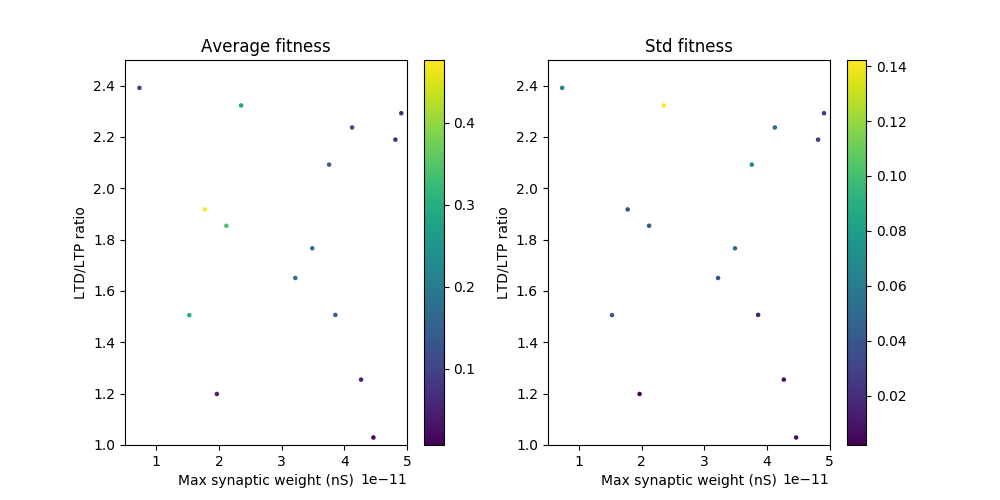

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,0],parameters[:,1],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel('Max synaptic weight (nS)')
plt.xlim(min_parameter_values[0],max_parameter_values[0])
plt.ylabel('LTD/LTP ratio')
plt.ylim([min_parameter_values[1],max_parameter_values[1]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,0],parameters[:,1],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel('Max synaptic weight (nS)')
plt.xlim(min_parameter_values[0],max_parameter_values[0])
plt.ylabel('LTD/LTP ratio')
plt.ylim([min_parameter_values[1],max_parameter_values[1]])
plt.colorbar()
plt.show()